In [1]:
%reset -f

import numpy as np
np.set_printoptions(linewidth=210)  # 210
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))   # 100%

import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

import sys
import importlib
%load_ext autoreload
%autoreload

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
%autoreload

# Load analytic solutions:
from solutions_hernquist_mond import *
import solutions_hernquist_mond; from solutions_hernquist_mond import *
#importlib.reload(solutions_hernquist_mond)

# Numer of particles:
n_points_1D = 64
n_points    = n_points_1D**3

# Input file:
file_in = "../solve_runs/runs/run_032_016mpc/solve_static_test.dat"

# Parameters for analytic solutions:
#===================================
hm           = hernquist_solver_mond_with_mass()
# Parameters of the density profile:
hm.ratio_rho = 1.0e+4         # Ratio between central density and mean density of the Universe.
hm.aH        = 0.25           # Constant in Herquist potential
# MOND parameters:
hm.M2        = 0.0
hm.KB        = 0.0
hm.a0        = 1.0e-8 * hm.cm2mpc/(hm.sec2gyr**2)
# Cosmology:
hm.h_small   = 1.0
hm.H0        = 100.0            #*hm.km2mpc   #/hm.sec2gyr
hm.omegam    = 0.3
hm.z         = 0.0              # Redshift (needed because expansion factors should appear in the equations (which are not included now))
hm.a         = 1.0/(1.0+hm.z)   # Expansion factor
# Grid:
hm.r_left    = 1.0e-1   # Mpc.  Boundaries of the domain.
hm.r_right   = 18.0
# Initialize and calculate solutions:

hm.omegam = hm.omegam/15.0  # This changes G!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

hm.init_hernquist_solver_mond_with_mass()
r_plot_hm, delta_hm, phi_newt_hm, psi_zero_hm, psi_hm = hm.solve_hernquist()


a0       =  3.1101769768722343 mpc/gyr^2
H0       =  100.0 1/gyr
C        =  0.00030238165249353707 1/gyr^2
rho_mean = 5.749127e+09 msun/mpc**3


/home/claudio/work/2020/mond_again/solve_based_project/new_codes_and_runs/source_solve/tests/test_runs_spherical/analysis/solutions_hernquist_mond.py:94: RuntimeWarning: invalid value encountered in sqrt
  integrand_2 = 0.5*(psi[1]+np.sqrt(psi[1]**2+4.0*self.a0*psi[1]))


In [3]:
def read_fine(): 
    
    f = open(file_in,'rb')
    tmp = np.fromfile(f, dtype=np.float64, count=-1)
    f.close()
    
    tmp = np.reshape(tmp, ((int(len(tmp)/8),8)))
    r         = tmp[:,0]
    rho       = tmp[:,1]
    phi       = tmp[:,2]
    f         = tmp[:,3]
    chi_bar   = tmp[:,4]
    f_chi_bar = tmp[:,5]
    phi_bar   = tmp[:,6]
    f_phi_bar = tmp[:,7]
    
    return r, rho, phi, f, chi_bar, f_chi_bar, phi_bar, f_phi_bar

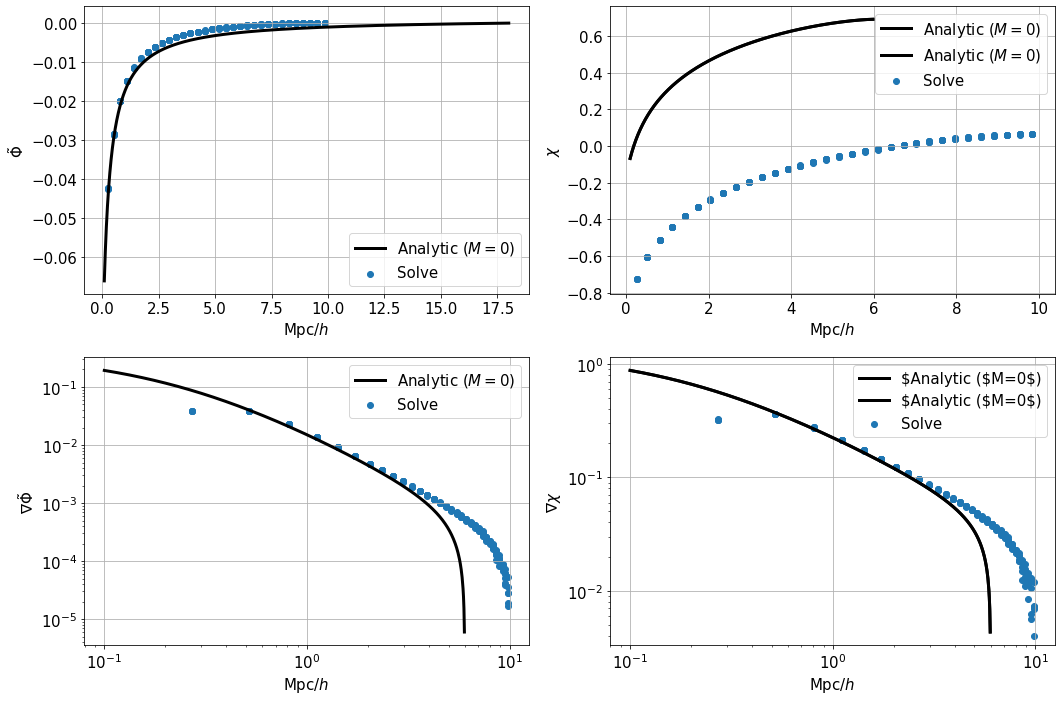

In [4]:

# Read solutions solve:
r, rho, phi, f, chi_bar, f_chi_bar, phi_bar, f_phi_bar = read_fine()

# Do the plot:
#=============
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})

plt.subplot(221)
plt.plot(r_plot_hm, phi_newt_hm-phi_newt_hm[np.argmin(np.abs(r_plot_hm-[18.0]*len(r_plot_hm)))], label="Analytic ($M=0$)", c='k', lw=3)
plt.scatter(r, phi_bar, label="Solve")
plt.xlabel("Mpc/$h$")
plt.ylabel("$\\tilde{\Phi}$")
plt.grid()
plt.legend()


plt.subplot(222)
plt.plot(psi_zero_hm.t, psi_zero_hm.y[2], label="Analytic ($M=0$)", c='k', lw=3)
plt.plot(psi_hm.t, psi_hm.y[2], label="Analytic ($M=0$)", c='k', lw=3)
plt.scatter(r, chi_bar, label="Solve")
plt.xlabel("Mpc/$h$")
plt.ylabel("$\chi$")
plt.grid()
plt.legend()

#===================================================================================
plt.subplot(223)
plt.plot(psi_zero_hm.t, psi_zero_hm.y[1], label="Analytic ($M=0$)", c='k', lw=3)
plt.scatter(r, f_phi_bar, label="Solve")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Mpc/$h$")
plt.ylabel("$\\nabla\\tilde{\Phi}$")
plt.legend()
plt.grid(True)

plt.subplot(224)
def chi_prime(phi_prime):
    return 0.5*(phi_prime+np.sqrt(phi_prime**2+4.0*hm.a0*phi_prime))
plt.plot(psi_zero_hm.t, chi_prime(psi_zero_hm.y[1]), label="$Analytic ($M=0$)", c='k', lw=3)
plt.plot(psi_hm.t, chi_prime(psi_hm.y[1]), label="$Analytic ($M=0$)", c='k', lw=3)
plt.scatter(r, f_chi_bar, label="Solve")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Mpc/$h$")
plt.ylabel("$\\nabla\chi$")
plt.legend()
plt.grid(True)

#plt.subplot(133)
#plt.scatter(r, f, label="$\Phi$ (Isis)")

plt.legend()
plt.tight_layout()
  
plt.savefig("figures/solve_solutions_hernquist.jpg", format="jpg", eps=300)
plt.show()

ZeroDivisionError: float division by zero

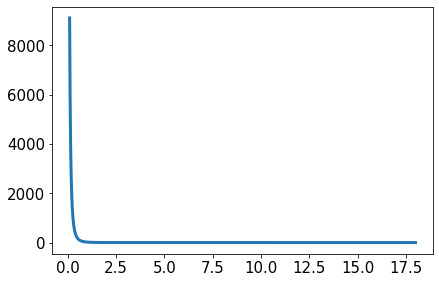

In [5]:
# Plot analytic solutions:
hm.plot_solutions(psi_zero_hm, psi_hm)

-0.9903467768198111 1442.1189909395018


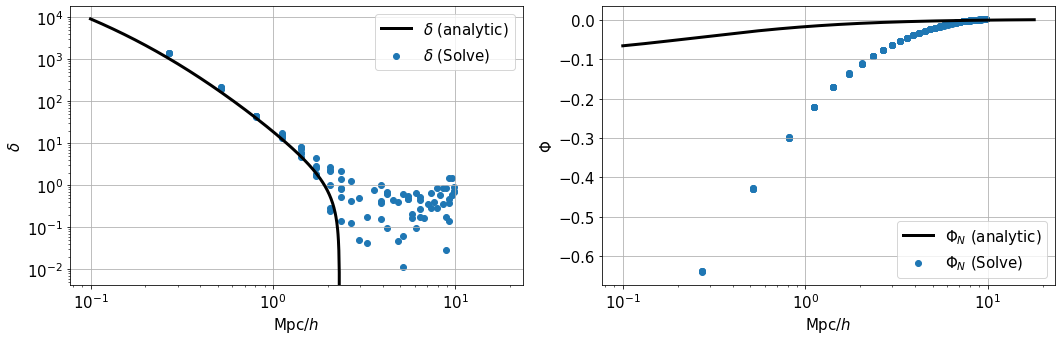

In [6]:
fig = plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 15})

print(np.min(rho), np.max(rho))
plt.subplot(121)
plt.scatter(r, (rho), label="$\delta$ (Solve)")
plt.plot(r_plot_hm, delta_hm, c='k', lw=3, label="$\delta$ (analytic)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Mpc/$h$")
plt.ylabel("$\delta$")
#plt.ylim(1.0e-3, 1.0e+4)
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(r_plot_hm, phi_newt_hm-phi_newt_hm[np.argmin(np.abs(r_plot_hm-[18.0]*len(r_plot_hm)))], label="$\Phi_{N}$ (analytic)", c='k', lw=3)
plt.scatter(r, phi, label="$\Phi_{N}$ (Solve)")
#plt.plot(psi_zero.t, (psi_zero.y[0]), alpha=0.5, lw=3, label="$\\tilde{\Phi}$")
#plt.plot(psi_zero.t, (psi_zero.y[2]), alpha=0.5, lw=3, label="$\chi$")
#plt.plot(psi_zero.t, (psi_zero.y[0]+psi_zero.y[2]), alpha=0.5, lw=3, label="$\Phi$")
#plt.xlabel("r")
#plt.ylabel("$\\tilde{\chi}$")
##plt.ylim(-0.1,1.1)
plt.xscale('log')
plt.xlabel("Mpc/$h$")
plt.ylabel("$\Phi$")
plt.legend()
plt.grid(True)

#plt.subplot(133)
#plt.scatter(r, f, label="$\Phi$ (Isis)")

plt.legend()
plt.tight_layout()
  
plt.savefig("figures/solve_solutions_hernquist.jpg", format="jpg", eps=300)
plt.show()
 